In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
df = pd.read_csv('CombinedAverageHouston.csv')

In [3]:
# Display the first few rows of the dataset
df.head()

,Delivery Date,Settlement Point,Wind,Solar,Other,Nuclear,Hydro,Coal,Gas-CC,Gas,...,HourlyRelativeHumidityHouston,HourlyWindSpeedHouston,HourlyDryBulbTemperatureSweet,HourlyRelativeHumiditySweet,HourlyWindSpeedSweet,Henry Hub Natural Gas Spot Price (Dollars per Million Btu),Natural Gas Futures Contract 1 (Dollars per Million Btu),Natural Gas Futures Contract 2 (Dollars per Million Btu),Natural Gas Futures Contract 3 (Dollars per Million Btu),Natural Gas Futures Contract 4 (Dollars per Million Btu)
0,1/1/2014,LZ_HOUSTON,6090.354514,14.020160,20.065096,5129.807656,11.951520,14939.89627,7058.775071,1184.984638,...,83.291667,3.208333,50.333333,50.125000,17.958333,NaN,NaN,NaN,NaN,NaN
1,1/2/2014,LZ_HOUSTON,3644.302401,22.974529,17.574283,5129.398416,38.645349,15658.13219,14071.053780,1597.470399,...,59.041667,13.458333,34.125000,61.583333,7.791667,4.32,4.321,4.296,4.183,4.171
2,1/3/2014,LZ_HOUSTON,8047.493869,30.243608,19.080778,5129.553945,24.177353,15323.23145,11947.269030,1275.808950,...,56.160000,5.240000,44.960000,43.120000,20.560000,4.39,4.304,4.282,4.168,4.156
3,1/4/2014,LZ_HOUSTON,6975.018926,21.279361,20.662932,5129.896468,17.407525,13774.86593,7200.981025,1183.796494,...,76.791667,8.708333,52.250000,44.833333,17.250000,NaN,NaN,NaN,NaN,NaN
4,1/5/2014,LZ_HOUSTON,5996.031588,22.861024,20.407603,5128.973865,27.053288,13237.12530,11412.541540,1597.652820,...,66.875000,14.791667,30.083333,53.583333,14.041667,NaN,NaN,NaN,NaN,NaN


In [4]:
# Check for missing values
df.isnull().sum()

Delivery Date                                                   0
Settlement Point                                                0
Wind                                                            0
Solar                                                           0
Other                                                           0
Nuclear                                                         0
Hydro                                                           0
Coal                                                            0
Gas-CC                                                          0
Gas                                                             0
Biomass                                                         0
Generation total                                                0
ERCOT_LOAD                                                      0
Settlement Point PriceDAM                                       0
Settlement Point PriceREAL                                      0
HourlyDryB

In [5]:
# Drop columns with a large number of missing values
df = df.dropna(thresh=len(df)*0.7, axis=1)

In [6]:
# Fill missing values with the mean
df = df.fillna(df.mean())

In [7]:
df.isnull().sum()

Delivery Date                       0
Settlement Point                    0
Wind                                0
Solar                               0
Other                               0
Nuclear                             0
Hydro                               0
Coal                                0
Gas-CC                              0
Gas                                 0
Biomass                             0
Generation total                    0
ERCOT_LOAD                          0
Settlement Point PriceDAM           0
Settlement Point PriceREAL          0
HourlyDryBulbTemperatureAmerillo    0
HourlyRelativeHumidityAmerillo      0
HourlyWindSpeedAmerillo             0
HourlyDryBulbTemperatureHouston     0
HourlyRelativeHumidityHouston       0
HourlyWindSpeedHouston              0
HourlyDryBulbTemperatureSweet       0
HourlyRelativeHumiditySweet         0
HourlyWindSpeedSweet                0
dtype: int64

In [8]:
# Convert 'Delivery Date' column to Unix timestamp
df['Delivery Date'] = pd.to_datetime(df['Delivery Date']).astype(int) / 10**9

In [9]:
# Save the cleaned dataset
df.to_csv('cleaned_data.csv', index=False)

In [10]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

       Delivery Date          Wind        Solar        Other      Nuclear  \
count   2.557000e+03   2557.000000  2557.000000  2557.000000  2557.000000   
mean    1.498954e+09   6946.593774   321.215825     2.400942  4614.341674   
std     6.378797e+07   3705.959972   363.681059     4.290720   685.819764   
min     1.388534e+09    230.798060     3.274447    -5.357451  2267.798871   
25%     1.443744e+09   4033.235882    54.757047     0.322032  3849.142868   
50%     1.498954e+09   6432.167376   193.014252     1.486236  4997.549581   
75%     1.554163e+09   9297.512207   447.605576     2.947268  5093.606609   
max     1.609373e+09  19021.024000  1791.200068    37.090478  5144.579152   

             Hydro          Coal        Gas-CC          Gas      Biomass  ...  \
count  2557.000000   2557.000000   2557.000000  2557.000000  2557.000000  ...   
mean     83.096870  11023.173700  15817.562940  2482.606650    59.799069  ...   
std      67.328228   3241.788011   4656.277385  1657.258248    

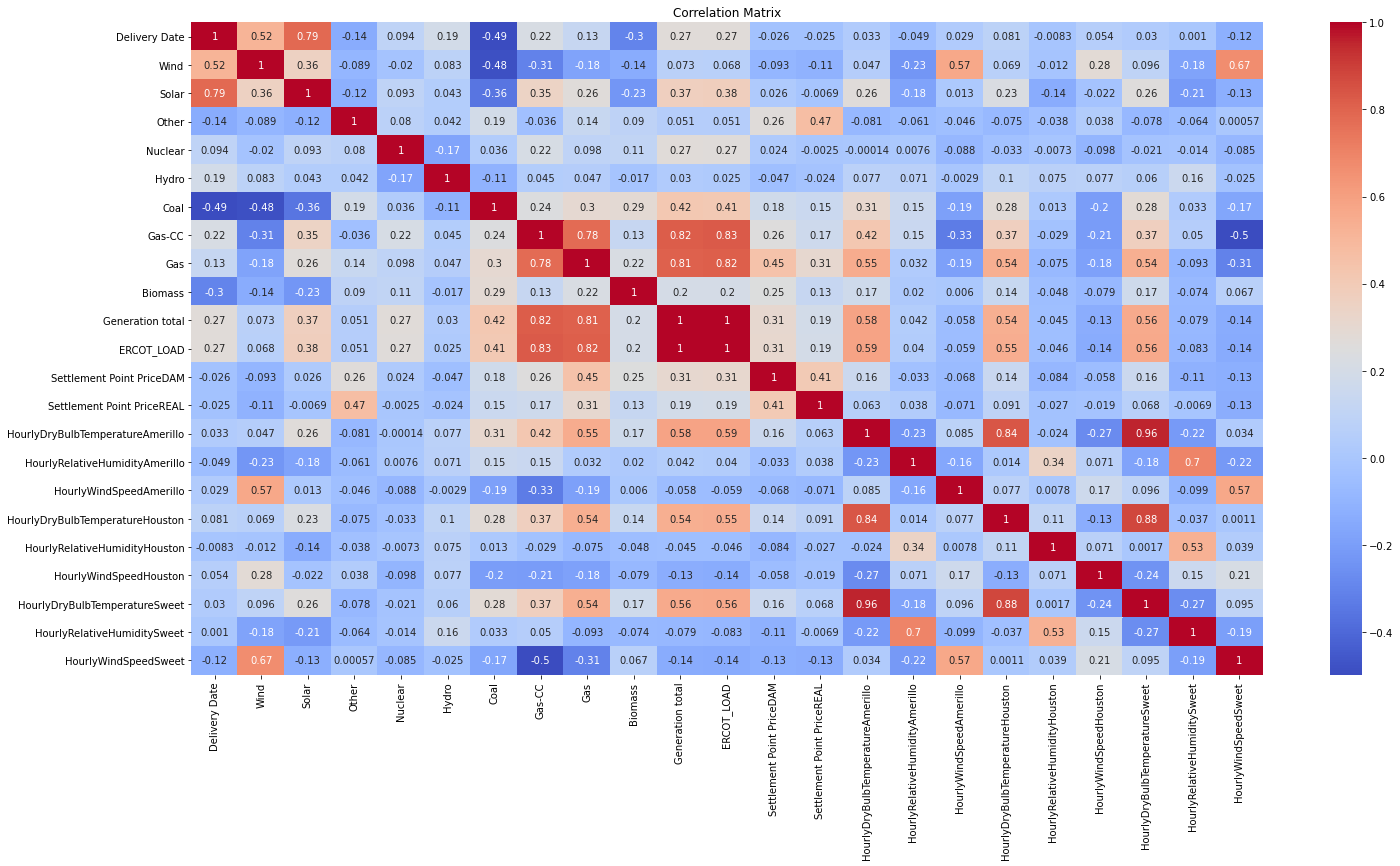

In [11]:
# Correlation matrix
corr_matrix = df.corr()
# Set the figure size
plt.figure(figsize=(24, 12))
# Plot the correlation matrix heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# Set the title
plt.title('Correlation Matrix')
# Display the plot
plt.show()

In [12]:
# Initialize the label encoder
label_encoder = LabelEncoder()

In [13]:
# Encode non-numeric values in the 'Settlement Point' column
df['Settlement Point'] = label_encoder.fit_transform(df['Settlement Point'])

In [14]:
# Split the dataset into features and target variable
X = df.drop('Settlement Point PriceDAM', axis=1)
y = df['Settlement Point PriceDAM']

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Perform feature scaling, if required
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Train a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [18]:
# Train a random forest regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [19]:
# Make predictions on the test set
lr_predictions = lr_model.predict(X_test_scaled)
rf_predictions = rf_model.predict(X_test)

In [20]:
# Calculate evaluation metrics
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

In [21]:
# Print the evaluation metrics
print("Linear Regression:")
print("MSE:", lr_mse)
print("R2 Score:", lr_r2)

Linear Regression:
MSE: 707.3559117448417
R2 Score: 0.455600381671016


In [22]:
print("\nRandom Forest Regression:")
print("MSE:", rf_mse)
print("R2 Score:", rf_r2)


Random Forest Regression:
MSE: 609.969219399245
R2 Score: 0.5305517283169877


In [23]:
# Get feature importances from the Random Forest Regression model
feature_importances = rf_model.feature_importances_

In [24]:
# Create a dataframe to store feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

In [25]:
# Sort the dataframe by importance (descending order)
importance_df = importance_df.sort_values('Importance', ascending=False)

In [26]:
# Print the ranked list of factors impacting electricity prices
print(importance_df)

                             Feature  Importance
9                                Gas    0.550099
13        Settlement Point PriceREAL    0.062447
22              HourlyWindSpeedSweet    0.052682
11                  Generation total    0.050302
17   HourlyDryBulbTemperatureHouston    0.042386
20     HourlyDryBulbTemperatureSweet    0.035219
0                      Delivery Date    0.031400
5                            Nuclear    0.019550
16           HourlyWindSpeedAmerillo    0.019442
21       HourlyRelativeHumiditySweet    0.018746
10                           Biomass    0.014939
19            HourlyWindSpeedHouston    0.014003
6                              Hydro    0.013627
2                               Wind    0.011704
12                        ERCOT_LOAD    0.010275
18     HourlyRelativeHumidityHouston    0.010214
7                               Coal    0.008825
8                             Gas-CC    0.008142
15    HourlyRelativeHumidityAmerillo    0.006863
3                   

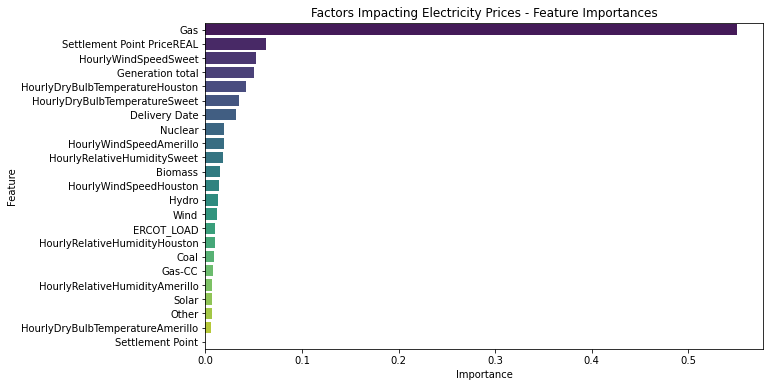

In [27]:
# Plotting the ranked list of factors impacting electricity prices
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Factors Impacting Electricity Prices - Feature Importances')
plt.show()